In [1]:
%load_ext autoreload

# Gaussian Mixture Model

In [2]:
%matplotlib inline
import os, sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('..')))

import plot.features
from database.CERNMongoClient import CERNMongoClient
from anomaly_detection import GMM

db = CERNMongoClient()

# auto-load changes in imported modules
%autoreload 2

## Selecting the number of components

### Bayesian Information Criterion

BIC = k ln(n) - 2 ln(L), where:
- k: number of free parameters to be estimated
- n: number of observations
- L: maximized value of likelihood function of the model
- x: observed data
- theta: parameters of model

Lowest BIC score gives best number of components

### 2 features

In [3]:
df = db.query("MKI\.(A|B)...\.B1:TEMP_TUBE_UP", resample_to='30min')

display(df.head(), df.describe(), df.values)

Fetching data for pattern MKI\.(A|B)...\.B1:TEMP_TUBE_UP from 2016-04-16 00:00:00.000000 to 2016-09-14 00:00:00.000000
Fetching data for MKI.B5L2.B1:TEMP_TUBE_UP
Fetching data for MKI.A5L2.B1:TEMP_TUBE_UP


MKI.B5L2.B1:TEMP_TUBE_UP  MKI.A5L2.B1:TEMP_TUBE_UP
2016-04-16 22:00:00                      21.0                      21.0
2016-04-16 22:30:00                      21.0                      21.0
2016-04-16 23:00:00                      21.0                      21.0
2016-04-16 23:30:00                      21.0                      21.0
2016-04-17 00:00:00                      21.0                      21.0

MKI.B5L2.B1:TEMP_TUBE_UP  MKI.A5L2.B1:TEMP_TUBE_UP
count               7200.000000               7200.000000
mean                  36.488372                 48.701561
std                   13.911748                 24.987641
min                   15.525000                 15.525000
25%                   23.800000                 24.200000
50%                   35.187500                 42.241667
75%                   44.300000                 73.700000
max                   85.766667                102.400000

array([[21. , 21. ],
       [21. , 21. ],
       [21. , 21. ],
       ...,
       [22.3, 22.5],
       [22.3, 22.5],
       [22.3, 22.5]])

In [4]:
bic = GMM.bic_scores(df)

Fitting models for cv_type 'spherical'
Done with components: 1 2 3 4 5 6 7 8 
Fitting models for cv_type 'tied'
Done with components: 1 2 3 4 5 6 7 8 
Fitting models for cv_type 'diag'
Done with components: 1 2 3 4 5 6 7 8 
Fitting models for cv_type 'full'
Done with components: 1 2 3 4 5 6 7 8 


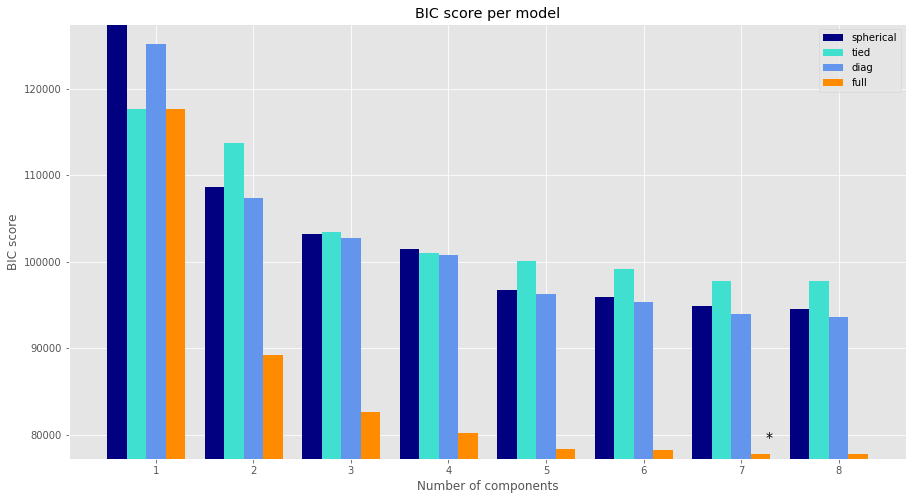

In [5]:
plot.features.gmm_bic_scores(bic)